from __future__  import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt 
plt.rc('figure',figsize=(12,5))
np.set_printoptions(precision=4)
%pwd

In [3]:
!head -n 10 ch02/names/yob1880.txt

head: ch02/names/yob1880.txt: No such file or directory


In [4]:
!head -n 10/Users/hikari/Downloads/pydata-book-master/ch02/names/yob1880.txt 

head: illegal line count -- 10/Users/hikari/Downloads/pydata-book-master/ch02/names/yob1880.txt


In [6]:
import pandas as pd
names1880 = pd.read_csv('/Users/hikari/Downloads/pydata-book-master/ch02/names/yob1880.txt',names=['name','sex','birth'])

In [7]:
names1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [9]:
names1880.groupby('sex').birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [11]:
years  =range(1880,2011)
pieces = []
columns = ['name','sex','birth']
for year in years:
    path = '/Users/hikari/Downloads/pydata-book-master/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year']= year
    pieces.append(frame)
names = pd.concat(pieces,ignore_index=True)

In [12]:
total_births = names.pivot_table('births',index = 'year',columns='sex',aggfunc=sum)

In [13]:
total_births.tail()

year


In [30]:
##total_births.plot(title='Total Births by sex and year')


TypeError: 'DataFrame' object is not callable

In [34]:
def add_prop(group):
    birth = group.birth.astype(float)
    group['prop']= birth / birth.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [35]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [36]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [37]:
def get_top1000(group):
    return group.sort_index(by='birth',ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

/Users/hikari/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [38]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='birth', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

/Users/hikari/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [39]:
top1000.index = np.arange(len(top1000))

In [40]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [41]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [43]:
total_birth = top1000.pivot_table('birth',index ='year',columns ='name',aggfunc =sum)
total_birth

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


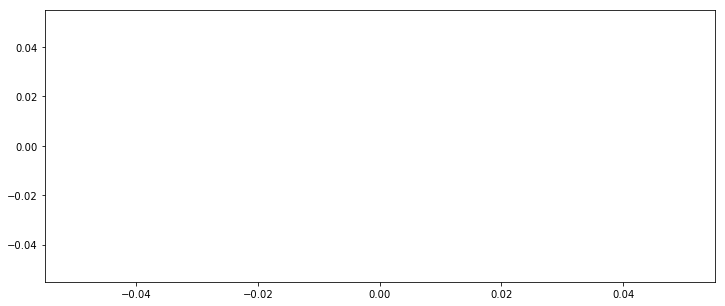

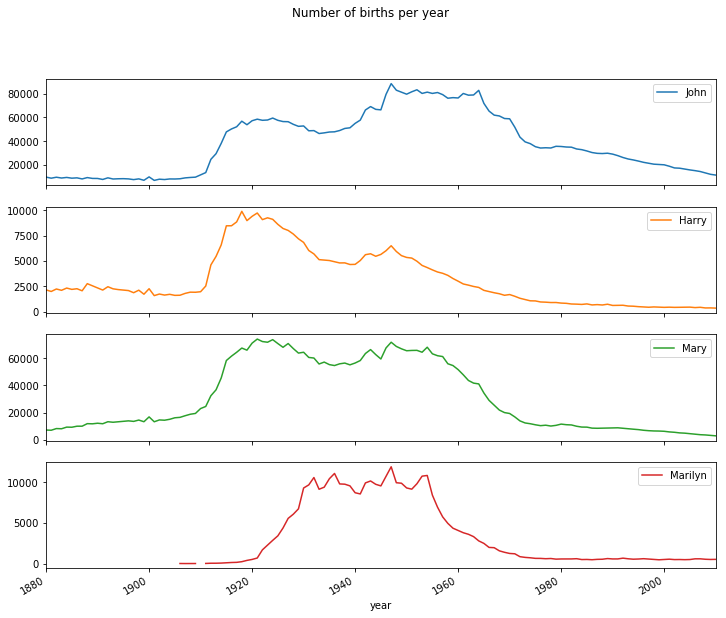

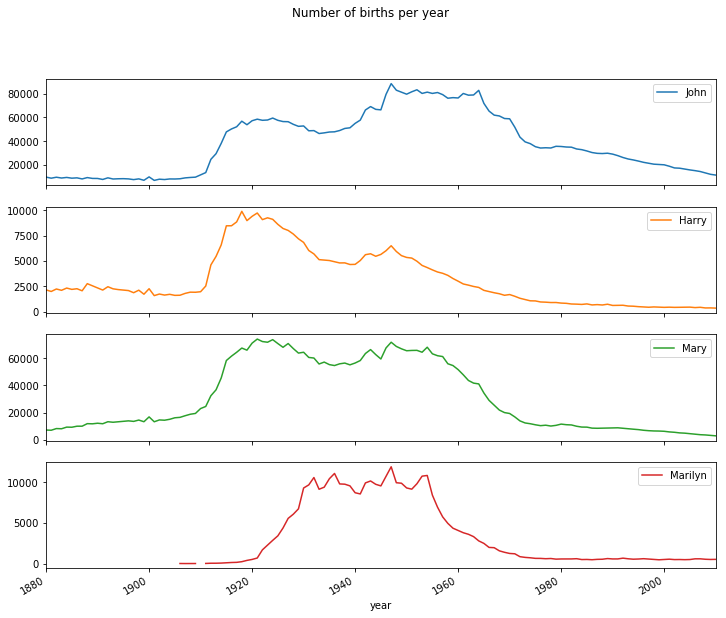

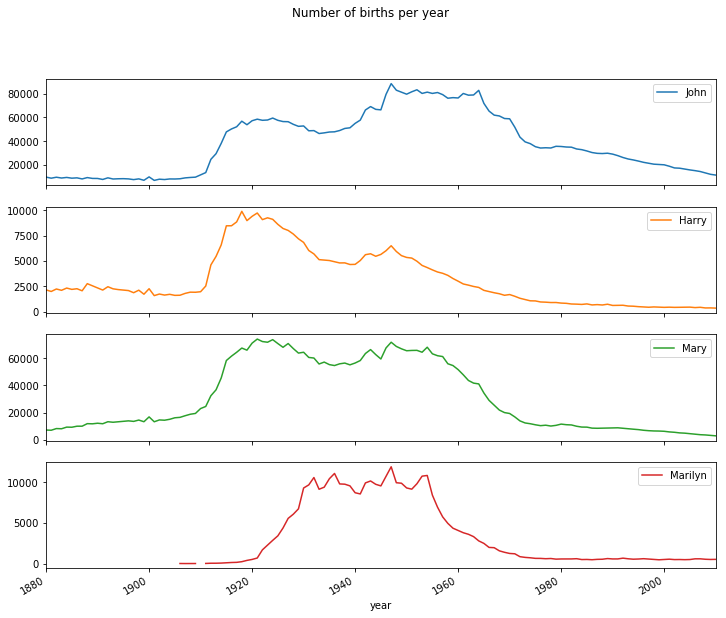

In [48]:
subset = total_birth[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")
plt.show()

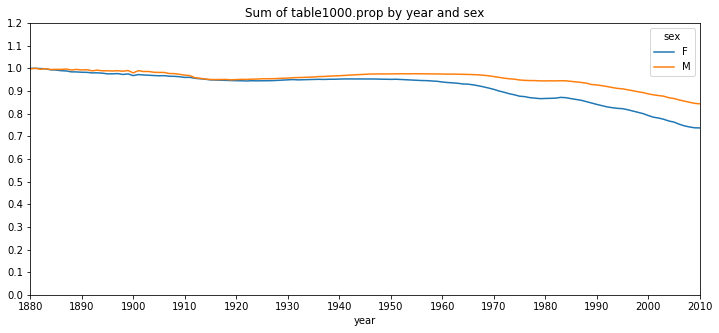

In [49]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.show()

In [51]:
df = boys[boys.year ==2010]
df

,name,sex,birth,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [52]:
prop_cumsum =df.sort_index(by='prop',ascending=False).prop.cumsum()

/Users/hikari/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [53]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [54]:
prop_cumsum.searchsorted(0.5)

array([116])

In [55]:
df = boys[boys.year == 1900]

In [56]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

/Users/hikari/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


25

In [58]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)+1
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

/Users/hikari/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [59]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [60]:
diversity.plot(title="Number of popular names in top 50%")

TypeError: Empty 'DataFrame': no numeric data to plot

In [62]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('birth', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [63]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [64]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [65]:
letter_prop = subtable / subtable.sum().astype(float)

In [66]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [67]:
plt.subplots_adjust(hspace=0.25)

In [68]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [69]:
dny_ts.plot()

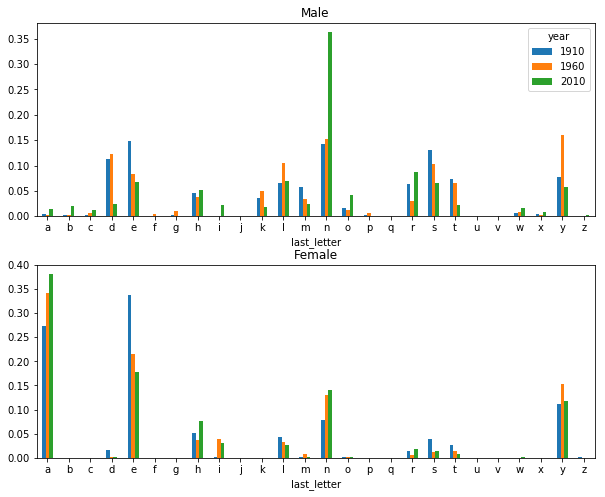

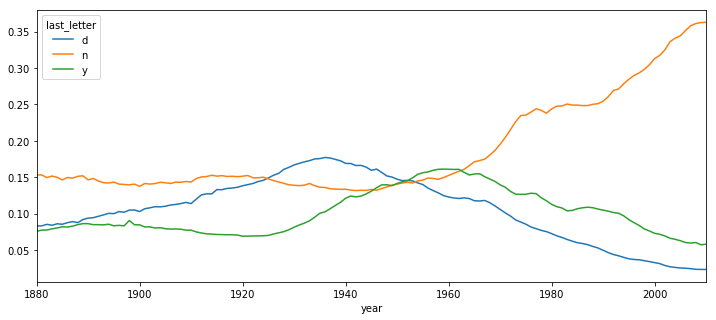

In [70]:
plt.show()

In [71]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [72]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'births'

In [73]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

year
